# Vectors

Esta tabla contiene la información de las expresiones del tipo vector (Listas, diccionarios, etc). 

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

full_table = get_data('vectors')

# Table name, features and target.
TABLE_NAME = 'vectors'
TABLE_FEATURES = ['vector__category', 'vector__number_of_elements', 'vector__homogeneous', 'vector__expertise_level']
TABLE_TARGET = 'vector__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

2024-07-04 19:40:39.884083 Data cache files found ...
2024-07-04 19:40:39.938578 Data cache files successfully loaded!!
Features shape: (351664, 4)
Target shape: (351664,)
As we can see the downloaded data contains a total of 351664 instances. For each instance we have 4 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351664 entries, 0 to 351663
Data columns (total 4 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   vector__category            351664 non-null  object
 1   vector__number_of_elements  351664 non-null  int64 
 2   vector__homogeneous         351664 non-null  bool  
 3   vector__expertise_level     351664 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 8.4+ MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 351664 entries, 0 to 351663
Series name: vector__expertise_level
Non-Null Count   Dtype 
--------------   ----- 
351664 non-null  object
dtypes: object(1)
memory usage: 2.7+ MB
None


Cómo podemos ver la tabla está compuesta por 1 variable numérica, 1 variables boleanas y 2 de tipo objeto.

### 2.1 - Equilibrado de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for EXPERT class.")

The dataset contains 34.63% instances for BEGINNER class and 65.37% for EXPERT class.


### 2.2 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

vector__category              0
vector__number_of_elements    0
vector__homogeneous           0
vector__expertise_level       0
dtype: int64

In [5]:
print_empty_cols(X)

vector__category
----------------
0 instancias no tienen un valor para la columna vector__category


vector__number_of_elements
--------------------------
0 instancias no tienen un valor para la columna vector__number_of_elements


vector__homogeneous
-------------------
0 instancias no tienen un valor para la columna vector__homogeneous


vector__expertise_level
-----------------------
0 instancias no tienen un valor para la columna vector__expertise_level




### 2.3 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vector__category,351664,4,TupleLiteral,234902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vector__number_of_elements,351664.0,NaN,NaN,NaN,4.374909,67.237444,0.0,2.0,2.0,3.0,14519.0
vector__homogeneous,351664,2,False,192086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vector__expertise_level,351664,2,EXPERT,229900,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "vector__number_of_elements": [(0.0, 2.0), (2.0, 2.0), (2.0, 3.0), (3.0, inf)], # min: 0 ; max: 14519
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['vector__number_of_elements'], 10))
print(get_statistics(full_table, ['vector__category'], 10))
print(get_statistics(X_copy, ['vector__homogeneous'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['variable__is_magic', 'variable__name_convention_Discard'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
vector__number_of_elements  count  percentage
                 [2.0_2.0] 179486   51.039060
                 [3.0_inf] 104012   29.577096
                 [0.0_2.0)  68166   19.383844

 vector__category  count  percentage
     TupleLiteral 234902   66.797284
      ListLiteral  73026   20.765845
DictionaryLiteral  41857   11.902555
       SetLiteral   1879    0.534317

 vector__homogeneous  count  percentage
               False 192086   54.622026
                True 159578   45.377974

--- TWO FEATURES ---
--- THREE FEATURES ---


In [8]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (351664, 8)
Target shape: (351664,)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

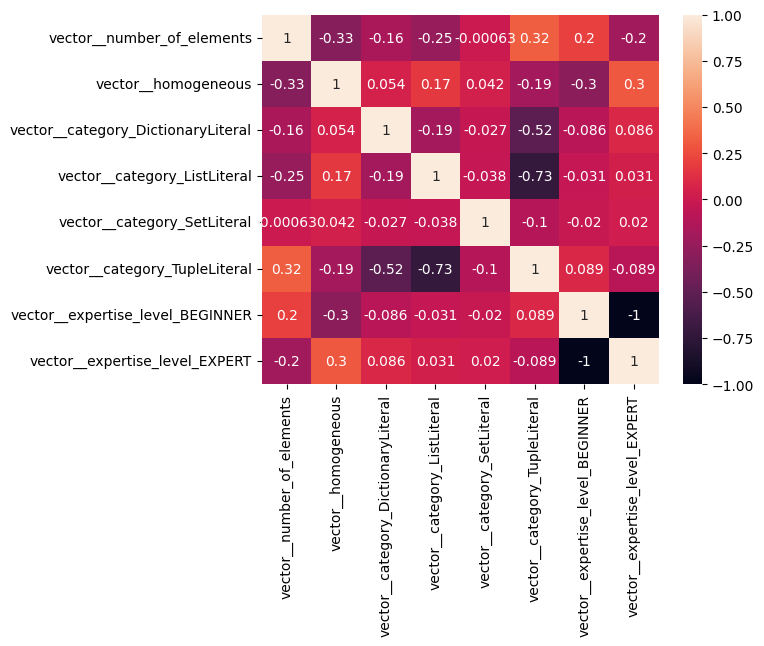

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 3 variables (1 numerica, 1 booleanas y 1 categorica) se hara un analisis detallado

### Variable homogeneous (1/3)
Esta variable es de tipo booleano y representa si todos los elementos de la lista son del mismo tipo.

<Axes: xlabel='vector__homogeneous', ylabel='Count'>

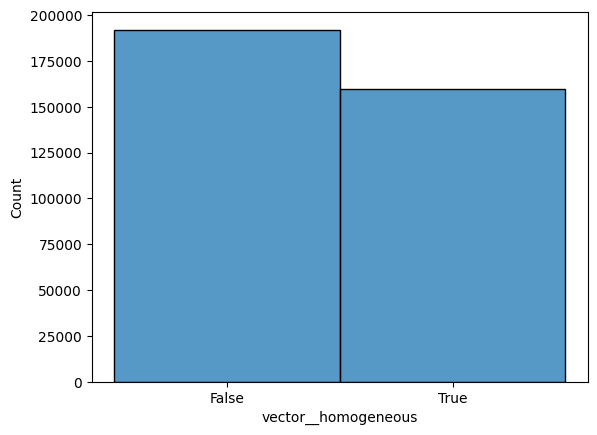

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['vector__homogeneous'], discrete=True)

In [11]:
num_true_values = len(X[X['vector__homogeneous'] == True])
num_false_values = len(X[X['vector__homogeneous'] == False])
std = X['vector__homogeneous'].std()
freq_true = len(X[X['vector__homogeneous'] == True]) / len(X['vector__homogeneous'])
freq_false = len(X[X['vector__homogeneous'] == False]) / len(X['vector__homogeneous'])
print(f'La variable homogeneous contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable homogeneous a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable homogeneous a False es {freq_false}.')

La variable homogeneous contiene 159578 valores verdaderos y 192086 valores falsos. Y, la desviación típica es de 0.49785980582237244
La frecuencia con la que programa puede tener la variable homogeneous a True es 0.4537797443013786.
La frecuencia con la que programa puede tener la variable homogeneous a False es 0.5462202556986214.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'vector__homogeneous', possible_values)

La variable vector__homogeneous contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable vector__homogeneous toma el valor de 0.0 en un 54.62% de los items.
La variable vector__homogeneous toma el valor de 1.0 en un 45.38% de los items.


In [13]:
X[X['vector__homogeneous'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,vector__number_of_elements,vector__homogeneous,vector__category_DictionaryLiteral,vector__category_ListLiteral,vector__category_SetLiteral,vector__category_TupleLiteral,vector__expertise_level_BEGINNER,vector__expertise_level_EXPERT
count,159578.000000,159578.0,159578.000000,159578.000000,159578.000000,159578.000000,159578.000000,159578.000000
mean,4.970516,1.0,0.138240,0.282044,0.008742,0.570975,0.190496,0.809504
std,75.211884,0.0,0.345152,0.449996,0.093088,0.494938,0.392694,0.392694
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,5376.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable number_of_elements (2/3)
Esta variable representa el número de elementos en la lista. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 14519. Con una media de 4.37.

<Axes: ylabel='vector__number_of_elements'>

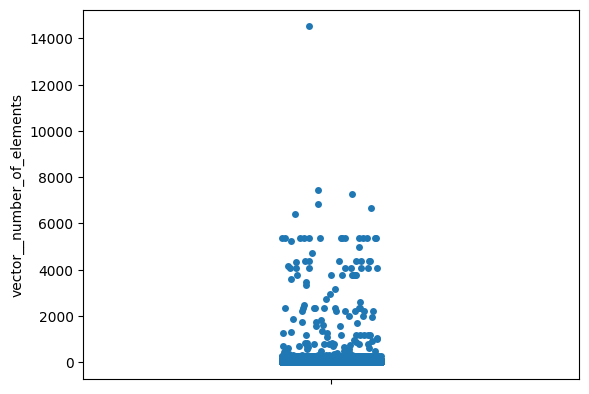

In [14]:
sns.stripplot(X['vector__number_of_elements'])

### IMPORTANT
El valor maximo esta muy alejado de los siguientes valores.

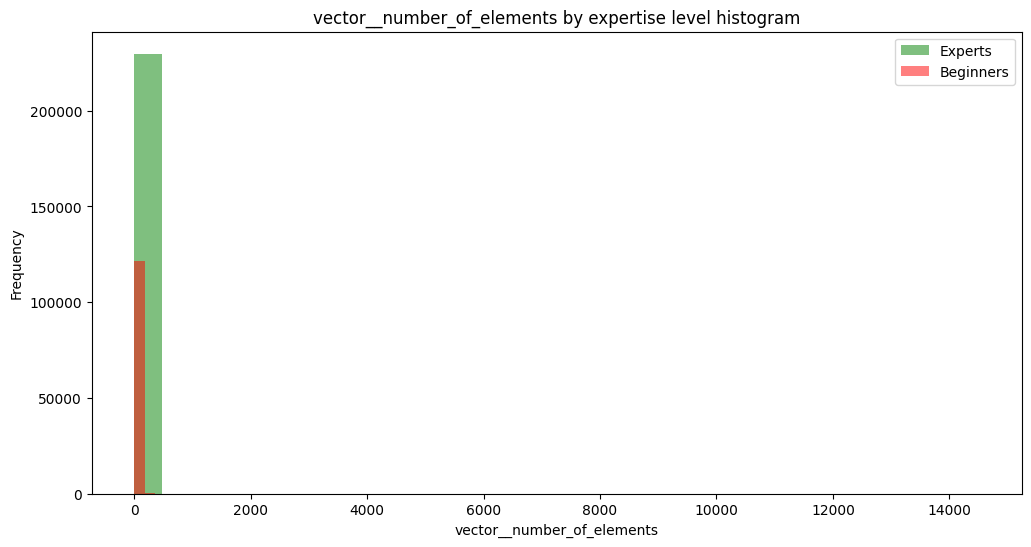

In [15]:
print_histogram(X, 'vector__number_of_elements', 'vector__expertise_level', bins=30, include_all=False)

In [16]:
print_outliers_for_df_column(X, 'vector__number_of_elements')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9890442535317641
Rango valores atípicos extremos (Tukey): [-1.0,6.0]
Rango valores atípicos leves (Tukey): [0.5,4.5]
Rango valores atípicos extremos (Fixed BoxPlot): [1.9529333115255485,81.3857477741056]
-3.0IQR: 0 instancias tienen un valor para vector__number_of_elements inferior a -1.0 (Q1-3*IQR) para vector__number_of_elements. Representando un 0.0% del total de instancias.
-1.5IQR: 30170 instancias tienen un valor para vector__number_of_elements inferior a 0.5 (Q1-1.5*IQR) para vector__number_of_elements. Representando un 8.579% del total de instancias.
+1.5IQR: 22080 instancias tienen un valor para vector__number_of_elements superior a 4.5 (Q3+1.5*IQR) para vector__number_of_elements. Representando un 6.279% del total de instancias.
+3.0IQR: 13980 instancias tienen un valor para vector__number_of_elements superior a 6.0 (Q3-3*IQR) para vector__number_of_elements. Representando un 3.975% del total de instancias.
L: 68166 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 81 (Con un MC de 98 usamos U)

In [17]:
X[X['vector__number_of_elements'] > 81].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,vector__number_of_elements,vector__homogeneous,vector__category_DictionaryLiteral,vector__category_ListLiteral,vector__category_SetLiteral,vector__category_TupleLiteral,vector__expertise_level_BEGINNER,vector__expertise_level_EXPERT
count,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000,1522.000000
mean,344.498688,0.602497,0.139290,0.338371,0.001314,0.521025,0.827858,0.172142
std,959.391052,0.489543,0.346363,0.473311,0.036238,0.499722,0.377628,0.377628
min,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,100.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,217.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,14519.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable category (3/3)
Esta variable es de tipo categorica y representa el tipo del vector.

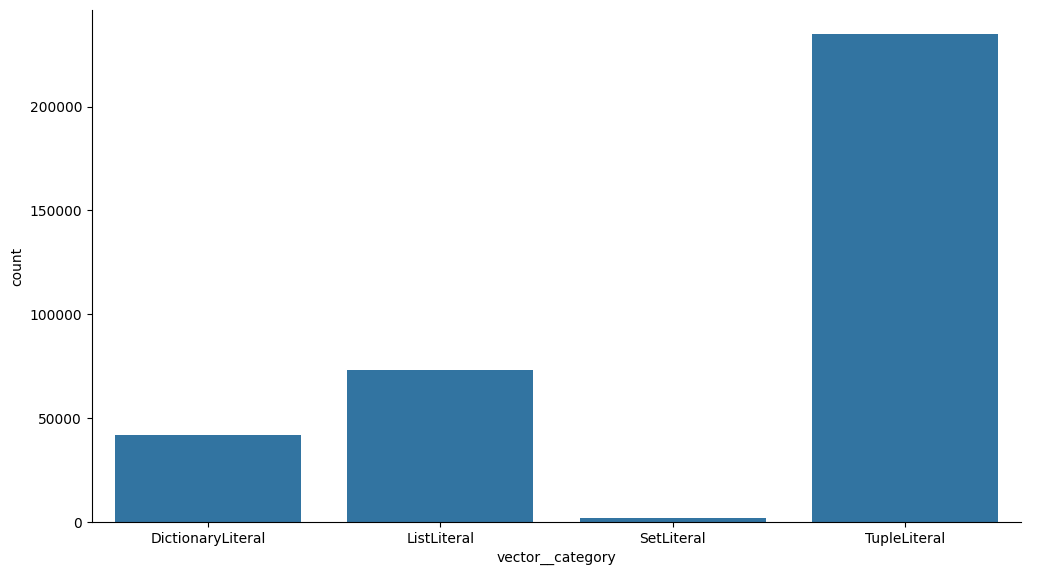

In [18]:
print_categorical_histogram(full_table, 'vector__category')

In [19]:
print_frequency_anal_for_cat_var(full_table, 'vector__category')

La variable vector__category contiene 4 valores distintos.
El umbral de outlier es de 0.05%
La variable vector__category toma el valor de TupleLiteral en un 66.8% de los items.
La variable vector__category toma el valor de ListLiteral en un 20.77% de los items.
La variable vector__category toma el valor de DictionaryLiteral en un 11.9% de los items.
La variable vector__category toma el valor de SetLiteral en un 0.5343% de los items.


In [20]:
print_values_usage_for_cat_var(full_table, 'vector__category', VECTOR_CATEGORY_VALUES)

La variable vector__category puede tomar 4 valores distintos
	4 (100.0%) valores utilizados
	0 (0.0%) valores NO utilizados


## Multivariate

Isolation forest algorithm

In [21]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,vector__category,vector__number_of_elements,vector__homogeneous,vector__expertise_level
2035,DictionaryLiteral,68,False,BEGINNER
10604,DictionaryLiteral,61,False,BEGINNER
10874,TupleLiteral,3760,True,BEGINNER
10879,TupleLiteral,5376,True,BEGINNER
11152,TupleLiteral,2352,True,BEGINNER
...,...,...,...,...
259588,SetLiteral,76,True,EXPERT
260887,SetLiteral,24,True,EXPERT
289985,SetLiteral,16,True,EXPERT
315723,SetLiteral,25,True,EXPERT


### IMPORTANTE
Revisar los outliers detectados.

In [22]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
vector__number_of_elements,64.0,2218.859375,2324.573975,14.0,56.00,1666.0,4368.0,7260.0
vector__homogeneous,64.0,0.750000,0.436436,0.0,0.75,1.0,1.0,1.0
vector__category_DictionaryLiteral,64.0,0.187500,0.393398,0.0,0.00,0.0,0.0,1.0
vector__category_ListLiteral,64.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
vector__category_SetLiteral,64.0,0.296875,0.460493,0.0,0.00,0.0,1.0,1.0
vector__category_TupleLiteral,64.0,0.515625,0.503707,0.0,0.00,1.0,1.0,1.0
vector__expertise_level_BEGINNER,64.0,0.765625,0.426956,0.0,1.00,1.0,1.0,1.0
vector__expertise_level_EXPERT,64.0,0.234375,0.426956,0.0,0.00,0.0,0.0,1.0


In [23]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
vector__number_of_elements,351600.0,3.971817,51.581577,0.0,2.0,2.0,3.0,14519.0
vector__homogeneous,351600.0,0.453726,0.497855,0.0,0.0,0.0,1.0,1.0
vector__category_DictionaryLiteral,351600.0,0.119013,0.323804,0.0,0.0,0.0,0.0,1.0
vector__category_ListLiteral,351600.0,0.207696,0.405659,0.0,0.0,0.0,0.0,1.0
vector__category_SetLiteral,351600.0,0.005290,0.072541,0.0,0.0,0.0,0.0,1.0
vector__category_TupleLiteral,351600.0,0.668001,0.470931,0.0,0.0,1.0,1.0,1.0
vector__expertise_level_BEGINNER,351600.0,0.346175,0.475750,0.0,0.0,0.0,1.0,1.0
vector__expertise_level_EXPERT,351600.0,0.653825,0.475750,0.0,0.0,1.0,1.0,1.0
